In [2]:
import tensorflow as tf
import pandas as pd 
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random

In [3]:
path = r'Final_Dataset'
data_dir = pathlib.Path(path)

#Desktop/Final_Dataset

In [4]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print("Class Names:", class_names)

Class Names: ['benign' 'malignant' 'normal']


In [5]:
benignPath = os.path.join(data_dir,'bening')
malignantPath = os.path.join(data_dir,'malignant')
normalPath = os.path.join(data_dir,'normal')

In [6]:
imageCount = len(list(data_dir.glob('*/*.png')))
imageCount

27392

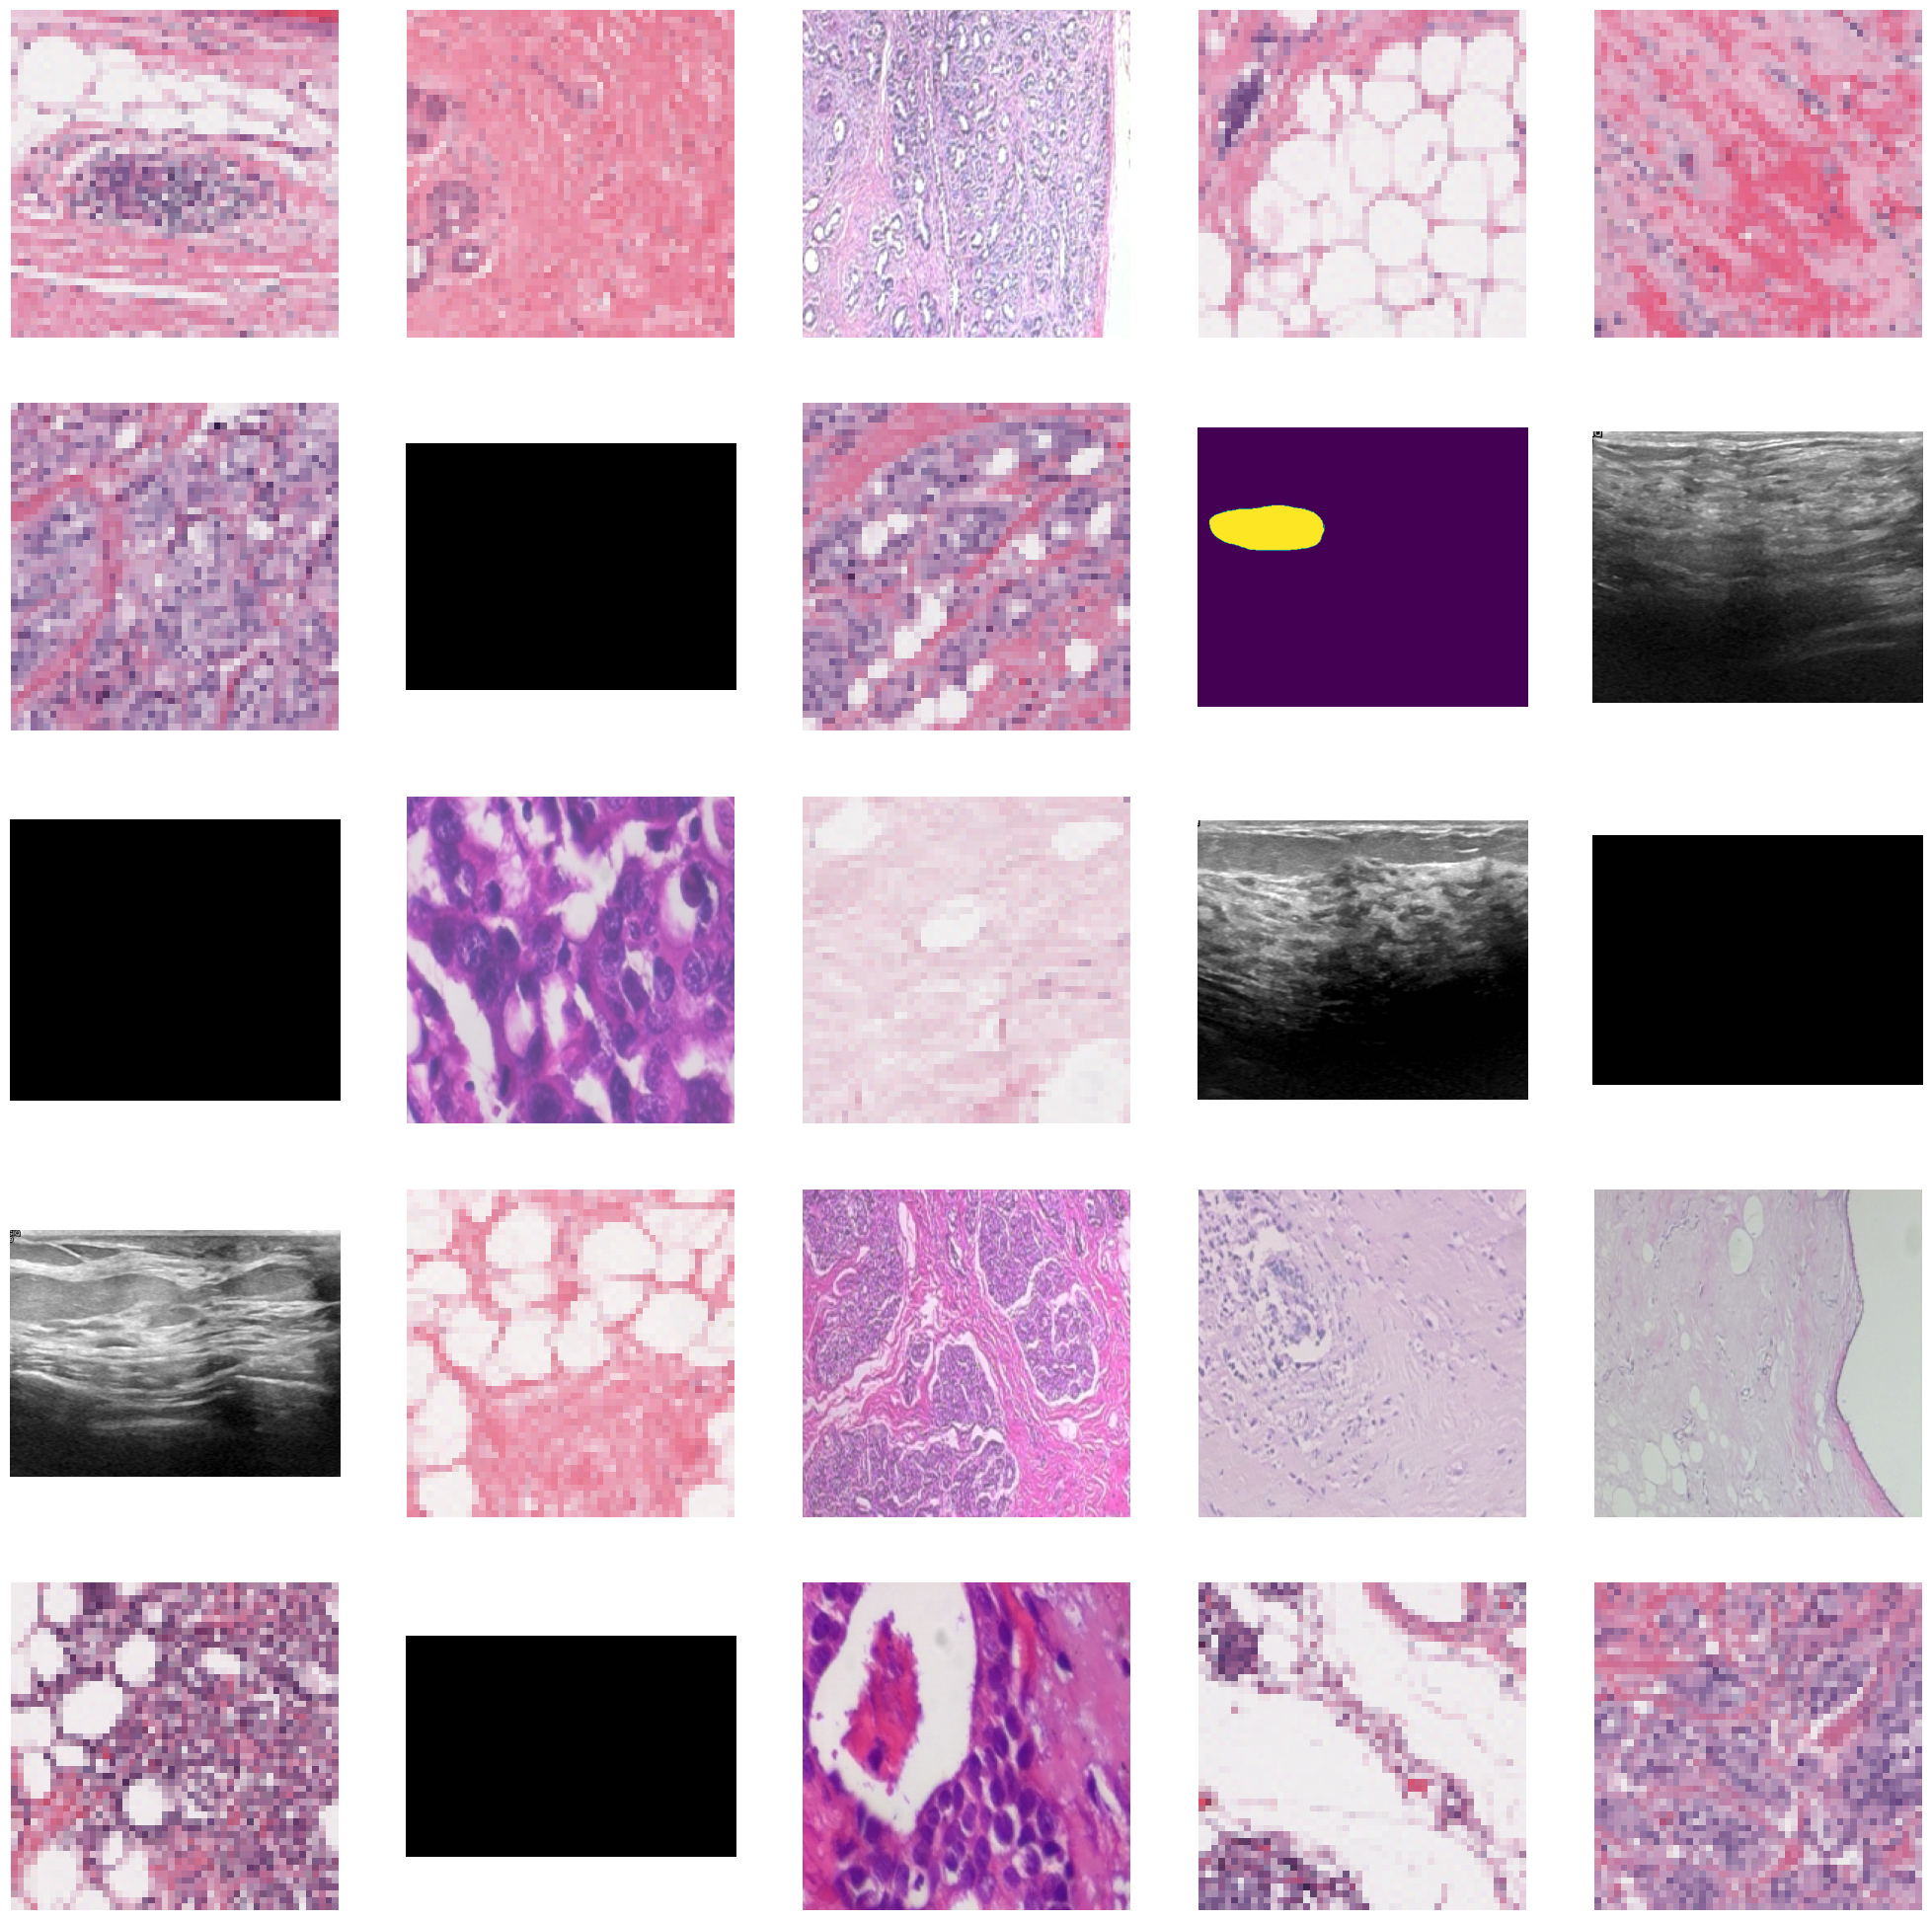

In [7]:
plt.figure(figsize=(25, 25))
for i in range(25):
    plt.subplot(5, 5, i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.png"))))
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [10]:
from pathlib import Path
import os
import imghdr

data_dir = '../input/breast-ultrasound-images-dataset/Final_Dataset/'
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [11]:
batch_size = 32
img_height = 224
img_width = 224

In [13]:
# Separating data sets

data_dir =  r'Final_Dataset'


from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.8,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)


Found 27392 files belonging to 3 classes.
Using 21914 files for training.
Found 27392 files belonging to 3 classes.
Using 27118 files for validation.


In [14]:
from tensorflow.keras import layers, models

# Define the input shape
input_shape = (img_height, img_width, 3)

# Define the input layer
inputs = layers.Input(shape=input_shape)

# Rescale pixel values to [0, 1]
x = layers.Rescaling(1./255)(inputs)

# Continue with the rest of your model
x = layers.Conv2D(16, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

outputs = layers.Dense(3, activation='sigmoid')(x)


outputs = layers.Dense(3, activation='softmax')(x)

In [15]:
model = models.Model(inputs, outputs)
model.compile(optimizer="adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

In [16]:
# Use GPU to fit the model else it will take much more time

epochs = 100
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)


Epoch 1/100


C:\Users\Bhagya Sri Manda\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


685/685 ━━━━━━━━━━━━━━━━━━━━ 527s 762ms/step - accuracy: 0.7014 - loss: 0.6430 - val_accuracy: 0.8237 - val_loss: 0.3995
Epoch 2/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 450s 598ms/step - accuracy: 0.8341 - loss: 0.3866 - val_accuracy: 0.8616 - val_loss: 0.3354
Epoch 3/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 468s 683ms/step - accuracy: 0.8551 - loss: 0.3435 - val_accuracy: 0.8855 - val_loss: 0.2815
Epoch 4/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 502s 733ms/step - accuracy: 0.8639 - loss: 0.3249 - val_accuracy: 0.8875 - val_loss: 0.2746
Epoch 5/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 483s 704ms/step - accuracy: 0.8769 - loss: 0.2944 - val_accuracy: 0.8489 - val_loss: 0.3418
Epoch 6/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 540s 788ms/step - accuracy: 0.8801 - loss: 0.2887 - val_accuracy: 0.9104 - val_loss: 0.2275
Epoch 7/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 511s 746ms/step - accuracy: 0.8918 - loss: 0.2636 - val_accuracy: 0.9108 - val_loss: 0.2332
Epoch 8/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 553s 807ms/step - accuracy: 0.9057 - los

In [17]:
#Keys

history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

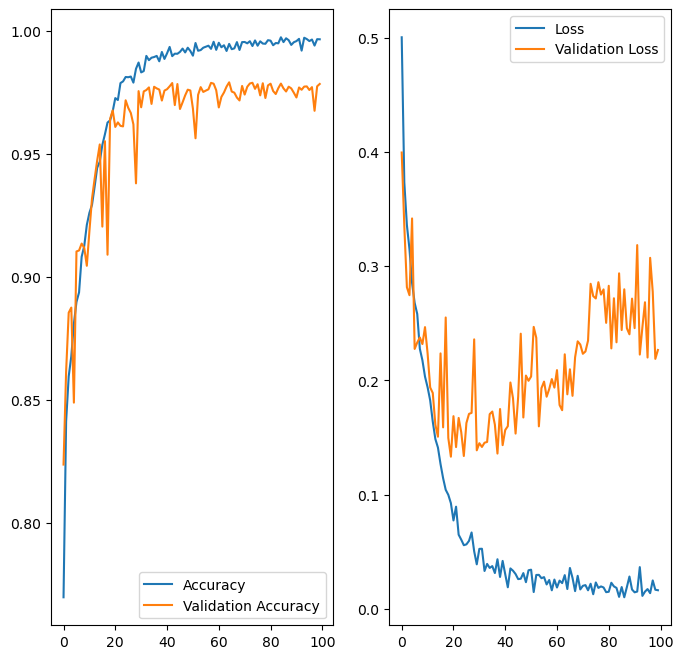

In [18]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

In [19]:
# Evaluating - İt return the lost and accuracy

model.evaluate(val_data)

848/848 ━━━━━━━━━━━━━━━━━━━━ 121s 142ms/step - accuracy: 0.9975 - loss: 0.0258


[0.224679633975029, 0.9784644842147827]

In [22]:
# Model summary

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,339,883 (73.78 MB)

 Trainable params: 6,446,627 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,893,256 (49.18 MB)

In [21]:
from sklearn.metrics import classification_report

# Assuming you have a trained model called 'model'
# And you have a validation dataset called 'val_data' with true labels 'y_true'

# Use the model to predict labels for the validation set
y_pred = model.predict(val_data)

# Get the class names from the validation dataset
class_names = val_data.class_names

# Convert the validation dataset labels to a list of class indices
y_true = []
for images, labels in val_data:
    y_true.extend(labels.numpy())

# Use classification_report to get precision, recall, f1-score, and support
report = classification_report(y_true, y_pred.argmax(axis=1), target_names=class_names)

print(report)


848/848 ━━━━━━━━━━━━━━━━━━━━ 125s 147ms/step
              precision    recall  f1-score   support

      benign       0.37      0.37      0.37      9937
   malignant       0.63      0.63      0.63     16917
      normal       0.01      0.01      0.01       264

    accuracy                           0.53     27118
   macro avg       0.34      0.34      0.34     27118
weighted avg       0.53      0.53      0.53     27118



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


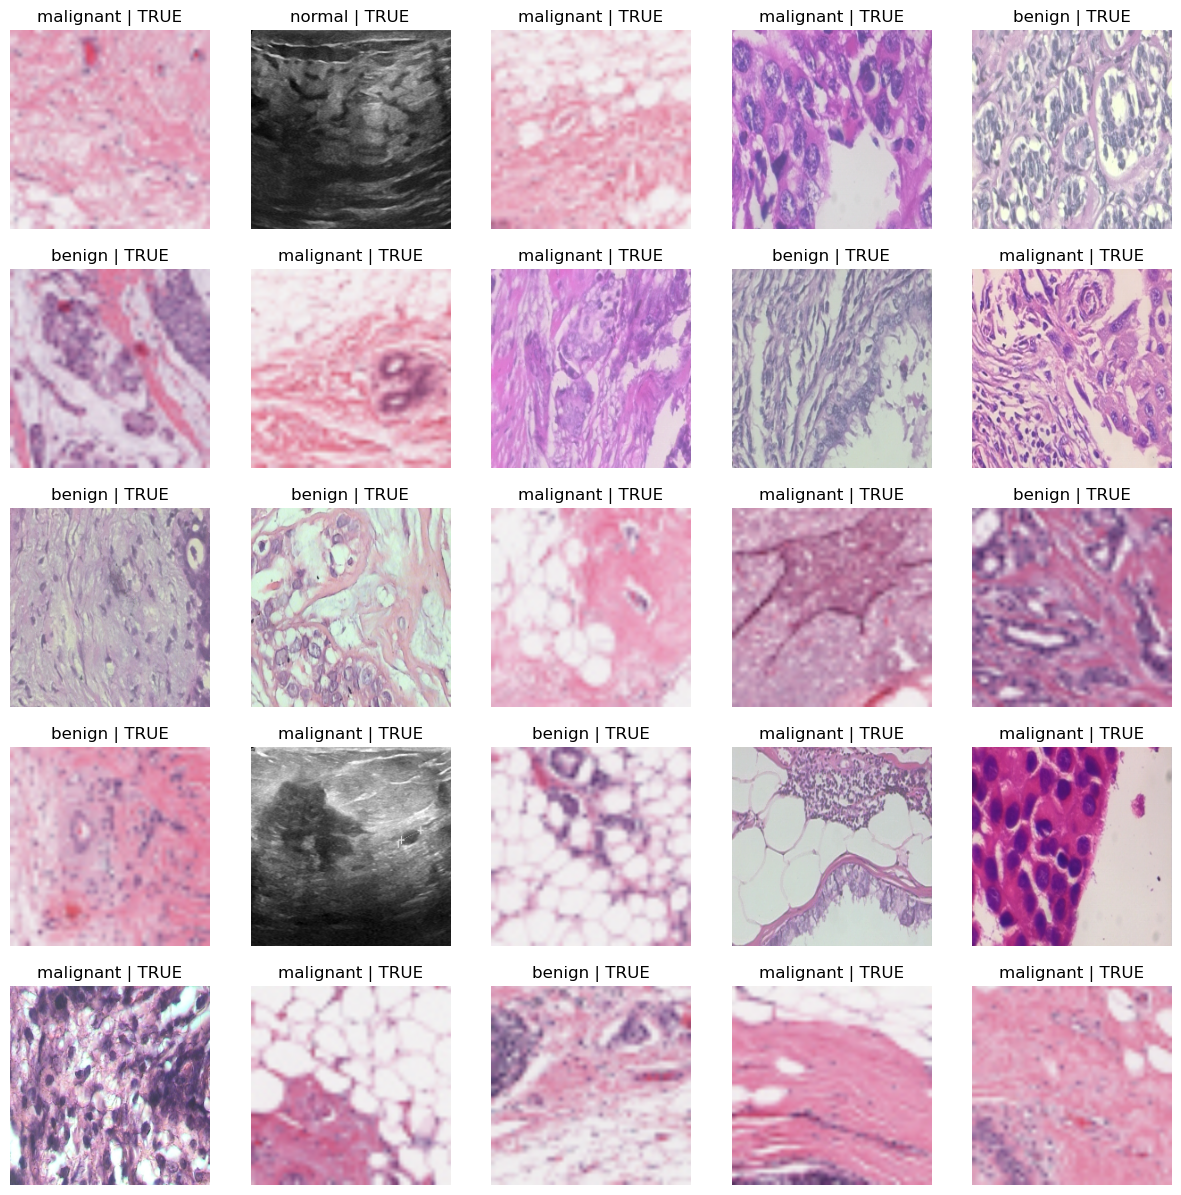

In [23]:
plt.figure(figsize=(15, 15))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")